In [1]:
# pylint disable=missing-module-docstring, invalid-name

**context:** German Mills Settlers Park

![flux_estimates_table.png](ipynb_img/flux_estimates_table.png)

**goal:** assess pressure changes over period of time before/during/after measurement to see if different fluxes can be explained

**reference paper:** https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2013GB004571 (see figure 4)

![pressure_profile_fig_from_paper.png](ipynb_img/pressure_profile_fig_from_paper.png)

*pressure data sourced from Buttonville Airport:* https://climate.weather.gc.ca/historical_data/search_historic_data_e.html

In [4]:
# -*- coding: utf-8 -*-

import os
from datetime import datetime, timedelta
from statistics import mean

import matplotlib.dates as md
# import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.dates import date2num
from matplotlib.ticker import FormatStrFormatter

In [5]:
def convert_to_time_hms(time_str):
    """
    Converts a time string in '%Y-%m-%d %H:%M:%S' format to a datetime object.
    """
    return datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S")


def convert_to_time_hm(time_str):
    """
    Converts a time string in '%Y-%m-%d %H:%M' format to a datetime object.
    """
    return datetime.strptime(time_str, "%Y-%m-%d %H:%M")

In [6]:
root_path = os.path.dirname(os.path.dirname(os.getcwd()))
transect_path = os.path.join(
    root_path, "src", "polyphemus_prep", "german_mills_transects"
)
buttonville_path = os.path.join(root_path, "data", "airport_data", "buttonville")
pressure_profiles_save_path = os.path.join(
    root_path, "outputs", "fig", "pressure_profiles"
)

In [7]:
transect_files = os.listdir(transect_path)

transect_entry_exit_times = {}
for i in range(len(transect_files)):
    if transect_files[i][-4:] != ".txt":
        df_transect = pd.read_csv(os.path.join(transect_path, transect_files[i]))
        df_transect["gps_time"] = df_transect["gps_time"].apply(convert_to_time_hms)
        df_transect.set_index("gps_time", inplace=True)
        times = {"entry": df_transect.index[0], "exit": df_transect.index[-1]}
        transect_entry_exit_times[transect_files[i][22:-4]] = times

print(transect_entry_exit_times)

{'2018-08-16': {'entry': Timestamp('2018-08-16 03:38:00'), 'exit': Timestamp('2018-08-16 03:41:30')}, '2018-08-28': {'entry': Timestamp('2018-08-28 09:31:01'), 'exit': Timestamp('2018-08-28 09:32:48')}, '2019-06-06_1': {'entry': Timestamp('2019-06-06 23:32:54'), 'exit': Timestamp('2019-06-06 23:34:48')}, '2019-06-06_2': {'entry': Timestamp('2019-06-06 23:39:03'), 'exit': Timestamp('2019-06-06 23:40:53')}, '2019-06-06_3': {'entry': Timestamp('2019-06-06 23:42:19'), 'exit': Timestamp('2019-06-06 23:44:29')}, '2019-12-12': {'entry': Timestamp('2019-12-12 23:00:10'), 'exit': Timestamp('2019-12-12 23:01:41')}, '2021-08-09_1': {'entry': Timestamp('2021-08-09 18:23:31'), 'exit': Timestamp('2021-08-09 18:25:14')}, '2021-08-09_2': {'entry': Timestamp('2021-08-09 18:44:53'), 'exit': Timestamp('2021-08-09 18:46:24')}}


In [8]:
drive_entry_exit_times = {}
transect_labels = list(transect_entry_exit_times.keys())
for i in range(len(transect_labels)):
    if len(transect_labels[i]) == 10:
        drive_entry_exit_times[transect_labels[i]] = transect_entry_exit_times[
            transect_labels[i]
        ]
    else:
        if transect_labels[i][-1] == "1":
            drive_entry_exit_times[transect_labels[i][:-2]] = {
                "entry": transect_entry_exit_times[transect_labels[i]]["entry"]
            }
        else:
            drive_entry_exit_times[transect_labels[i][:-2]][
                "exit"
            ] = transect_entry_exit_times[transect_labels[i]]["exit"]

print(drive_entry_exit_times)

{'2018-08-16': {'entry': Timestamp('2018-08-16 03:38:00'), 'exit': Timestamp('2018-08-16 03:41:30')}, '2018-08-28': {'entry': Timestamp('2018-08-28 09:31:01'), 'exit': Timestamp('2018-08-28 09:32:48')}, '2019-06-06': {'entry': Timestamp('2019-06-06 23:32:54'), 'exit': Timestamp('2019-06-06 23:44:29')}, '2019-12-12': {'entry': Timestamp('2019-12-12 23:00:10'), 'exit': Timestamp('2019-12-12 23:01:41')}, '2021-08-09': {'entry': Timestamp('2021-08-09 18:23:31'), 'exit': Timestamp('2021-08-09 18:46:24')}}


~~~~ 2018-08-16 ~~~~
hourly rate of change over 3h:	0.317 hPa/h
hourly rate of change over 6h:	0.44 hPa/h


~~~~ 2018-08-28 ~~~~
hourly rate of change over 3h:	-0.2307 hPa/h
hourly rate of change over 6h:	-0.0683 hPa/h


~~~~ 2019-06-06 ~~~~
hourly rate of change over 3h:	-0.0183 hPa/h
hourly rate of change over 6h:	-0.0533 hPa/h


~~~~ 2019-12-12 ~~~~
hourly rate of change over 3h:	-0.7713 hPa/h
hourly rate of change over 6h:	-0.869 hPa/h


~~~~ 2021-08-09 ~~~~
hourly rate of change over 3h:	-0.206 hPa/h
hourly rate of change over 6h:	-0.17 hPa/h




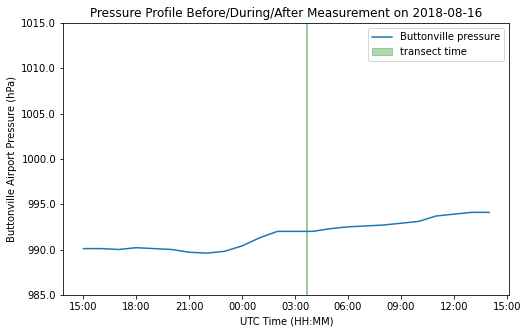

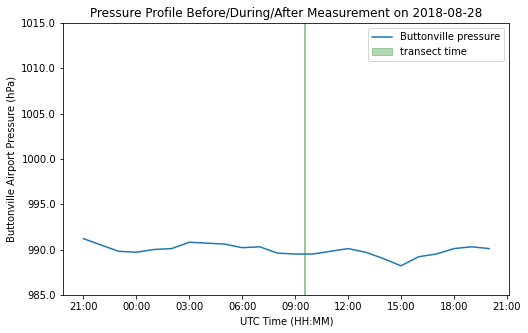

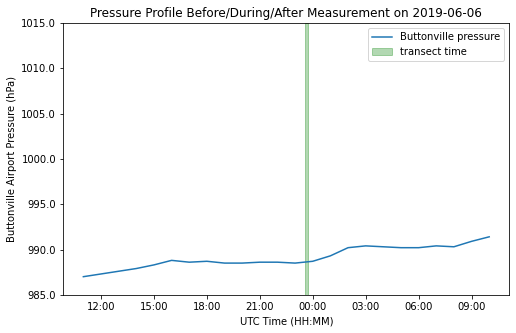

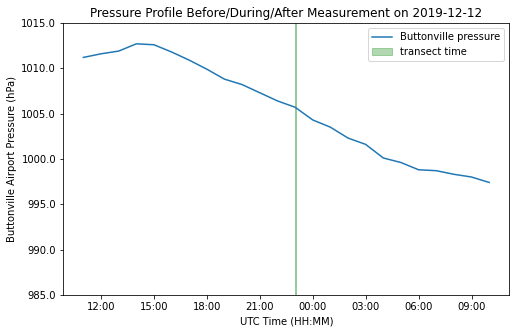

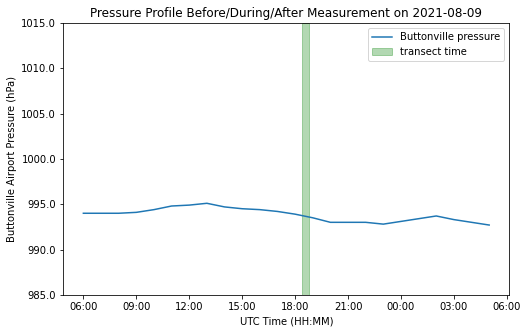

In [9]:
dates = list(drive_entry_exit_times.keys())

for i in range(len(dates)):

    buttonville_start_time = drive_entry_exit_times[dates[i]]["entry"] - timedelta(
        hours=12
    )
    buttonville_start_time = buttonville_start_time.replace(minute=0, second=0)
    #     print(buttonville_start_time)

    year = dates[i][:4]
    month = dates[i][5:7]
    day = dates[i][8:]
    buttonville_filename = (
        "en_climate_hourly_ON_6158409_" + month + "-" + year + "_P1H.csv"
    )
    df_buttonville = pd.read_csv(os.path.join(buttonville_path, buttonville_filename))
    df_buttonville["Date/Time (UTC)"] = df_buttonville["Date/Time (UTC)"].apply(
        convert_to_time_hm
    )

    buttonville_start_index = 0
    while (
        df_buttonville.loc[buttonville_start_index, "Date/Time (UTC)"]
        < buttonville_start_time
    ):
        buttonville_start_index += 1
    buttonville_end_index = buttonville_start_index + 23  # assuming not end of month

    hourly_time = df_buttonville.loc[
        buttonville_start_index:buttonville_end_index, "Date/Time (UTC)"
    ]
    pressure_kpa = df_buttonville.loc[
        buttonville_start_index:buttonville_end_index, "Stn Press (kPa)"
    ]
    pressure_hpa = pressure_kpa * 10
    #     print(hourly_time)
    #     print(pressure_hpa)

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(hourly_time, pressure_hpa, label="Buttonville pressure")
    ax.axvspan(
        date2num(drive_entry_exit_times[dates[i]]["entry"]),
        date2num(drive_entry_exit_times[dates[i]]["exit"]),
        label="transect time",
        color="green",
        alpha=0.3,
    )

    # weighted avg assuming airport data points are at end of interval
    avg_period = [3, 6]
    weighted_avg_change = []
    transect_exit_time = drive_entry_exit_times[dates[i]]["exit"]
    for j in range(len(avg_period)):
        weighted_pressure_change_hpa = []
        for k in range(len(pressure_hpa)):
            if hourly_time.iloc[k].hour < transect_exit_time.hour - avg_period[j]:
                weight = 0
            elif hourly_time.iloc[k].hour > transect_exit_time.hour + 1:
                weight = 0
            elif hourly_time.iloc[k].hour == transect_exit_time.hour - (
                avg_period[j] - 1
            ):
                weight = 1 - transect_exit_time.minute / 60
            elif hourly_time.iloc[k].hour == transect_exit_time.hour + 1:
                weight = transect_exit_time.minute / 60
            else:
                weight = 1
            pressure_change_over_hour = pressure_hpa.iloc[k] - pressure_hpa.iloc[k - 1]
            if weight != 0:
                weighted_pressure_change_hpa.append(pressure_change_over_hour * weight)
        #         print(weighted_pressure_change_hpa)
        weighted_avg_change.append(round(mean(weighted_pressure_change_hpa), 4))
    print("~~~~ " + dates[i] + " ~~~~")
    print(
        "hourly rate of change over "
        + str(avg_period[0])
        + "h:\t"
        + str(weighted_avg_change[0])
        + " hPa/h"
    )
    print(
        "hourly rate of change over "
        + str(avg_period[1])
        + "h:\t"
        + str(weighted_avg_change[1])
        + " hPa/h"
    )
    print("\n")

    plt.ylim([985, 1015])
    ax_format = plt.gca()
    ax_format.xaxis.set_major_formatter(md.DateFormatter("%H:%M"))
    ax_format.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))

    plt.title("Pressure Profile Before/During/After Measurement on " + dates[i])
    plt.xlabel("UTC Time (HH:MM)")
    plt.ylabel("Buttonville Airport Pressure (hPa)")
    plt.legend()
    # plt.savefig(
    #     os.path.join(
    #         pressure_profiles_save_path,
    #         "pressure_profile_during_" + dates[i] + "_measurement.png",
    #     ),
    #     facecolor="white",
    # )
    # plt.close()